
# Importing Dependecies

In [1]:

# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(42)

import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

# Load Train and Test Data set

In [2]:
X_test=pd.read_csv("../data/X_test.csv")
# X_test.head()

In [3]:
X_train=pd.read_csv("../data/X_train.csv")
X_train.head()

,age,trestBps,cholesterol,maxHeartRate,oldPeak,sex_fem,sex_male,chestPain_abnang,chestPain_angina,chestPain_asympt,...,slope_down,slope_flat,slope_up,vesselsColored_0.0,vesselsColored_1.0,vesselsColored_2.0,vesselsColored_3.0,thal_fix,thal_norm,thal_rev
0,52.0,118.0,186.0,190.0,0.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,41.0,112.0,268.0,172.0,0.0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,55.0,130.0,262.0,155.0,0.0,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
3,42.0,148.0,244.0,178.0,0.8,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,64.0,170.0,227.0,155.0,0.6,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [4]:
y_train=pd.read_csv("../data/y_train.csv")
# y_train.head()
y_train_source = y_train

In [5]:
y_test=pd.read_csv("../data/y_test.csv")
# y_test.head()
y_test_source = y_test

# One-Hot Encoding Labels

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
# y_train

//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
y_test_encoded = label_encoder.transform(y_test)
# y_test

In [8]:
y_train = to_categorical(y_train_encoded)
# y_train

In [9]:
y_test = to_categorical(y_test_encoded)
# y_test

# Preprocessing Data - Scaling Inputs

In [10]:
# X_train.shape

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Check shape of X_train_scaled
X_train_scaled.shape

(222, 28)

# Neural Network Model Creation

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

In [12]:
# Number of hot encoded inputs equals 28
inputs = X_train_scaled.shape[1]
hidden_layers=50;

# First hidden layer
model.add(Dense(units=hidden_layers,activation='relu', input_dim=inputs))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# Create output layer / labels
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

# Model Summary

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1450      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 1,552
Trainable params: 1,552
Non-trainable params: 0
_________________________________________________________________


# Compile Model

In [15]:
# using categorical crossentropy to compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model

In [16]:
epoch=50

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=epoch,
    verbose=2,
    validation_data=(X_test_scaled, y_test)
    )

Train on 222 samples, validate on 74 samples
Epoch 1/50
222/222 - 0s - loss: 0.5697 - acc: 0.7297 - val_loss: 0.5385 - val_acc: 0.7973
Epoch 2/50
222/222 - 0s - loss: 0.5223 - acc: 0.7928 - val_loss: 0.5076 - val_acc: 0.8108
Epoch 3/50
222/222 - 0s - loss: 0.4871 - acc: 0.8468 - val_loss: 0.4830 - val_acc: 0.8108
Epoch 4/50
222/222 - 0s - loss: 0.4560 - acc: 0.8559 - val_loss: 0.4628 - val_acc: 0.8243
Epoch 5/50
222/222 - 0s - loss: 0.4301 - acc: 0.8559 - val_loss: 0.4449 - val_acc: 0.7973
Epoch 6/50
222/222 - 0s - loss: 0.4082 - acc: 0.8604 - val_loss: 0.4296 - val_acc: 0.8108
Epoch 7/50
222/222 - 0s - loss: 0.3888 - acc: 0.8604 - val_loss: 0.4172 - val_acc: 0.8243
Epoch 8/50
222/222 - 0s - loss: 0.3726 - acc: 0.8649 - val_loss: 0.4067 - val_acc: 0.8243
Epoch 9/50
222/222 - 0s - loss: 0.3578 - acc: 0.8604 - val_loss: 0.3987 - val_acc: 0.8243
Epoch 10/50
222/222 - 0s - loss: 0.3459 - acc: 0.8649 - val_loss: 0.3916 - val_acc: 0.8243
Epoch 11/50
222/222 - 0s - loss: 0.3351 - acc: 0.8649 

# Quantify the Model

In [17]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

74/74 - 0s - loss: 0.4282 - acc: 0.8243
Loss: 0.42817897490552953, Accuracy: 0.8243243098258972


In [18]:
print(history.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


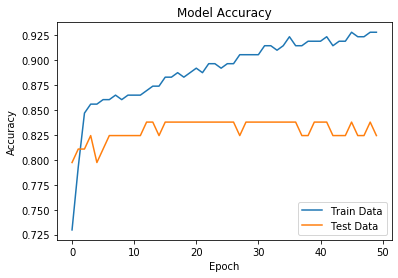

In [19]:
#creating a plot to display accurancy over each epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='lower right')
plt.show()

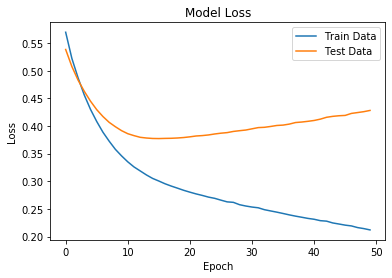

In [20]:
#creating a loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='upper right')
plt.show()

In [21]:
# Make predictions using X_test_scaled
encoded_predictions = model.predict(X_test_scaled)


In [22]:
# Decode the data

# Define a decode function
def decode(datum):
    return np.argmax(datum)

labeled_predictions =[]
for i in range(encoded_predictions.shape[0]):
    datum = encoded_predictions[i]
    #print(f'index: {i}')
    #print(f'encoded datum: {datum}')
    decoded_datum = decode(encoded_predictions[i])
    if (decoded_datum ==0):
        prediction='buff'
    else: 
        prediction= 'sick'
    # print(f'decoded datum: {decoded_datum}')
    print(f' index {i} predicted label: {prediction}')
    actual = y_test_source['buff'][i] 
    labeled_predictions.append(prediction)
    
    if (prediction != actual):
        print (f'*** index: {i} Predited {prediction}  Actual {actual}')

 index 0 predicted label: sick
 index 1 predicted label: sick
 index 2 predicted label: sick
 index 3 predicted label: buff
 index 4 predicted label: buff
*** index: 4 Predited buff  Actual sick
 index 5 predicted label: buff
 index 6 predicted label: buff
 index 7 predicted label: sick
 index 8 predicted label: buff
 index 9 predicted label: sick
 index 10 predicted label: buff
 index 11 predicted label: buff
 index 12 predicted label: sick
 index 13 predicted label: buff
 index 14 predicted label: sick
 index 15 predicted label: buff
 index 16 predicted label: buff
 index 17 predicted label: sick
*** index: 17 Predited sick  Actual buff
 index 18 predicted label: sick
 index 19 predicted label: buff
 index 20 predicted label: buff
 index 21 predicted label: sick
 index 22 predicted label: sick
 index 23 predicted label: buff
 index 24 predicted label: sick
 index 25 predicted label: sick
 index 26 predicted label: buff
*** index: 26 Predited buff  Actual sick
 index 27 predicted labe

In [23]:
# Save the model
model.save("NeuralNetwork.h5")

In [24]:
# Load the model
from tensorflow.keras.models import load_model
NeuralNetwork = load_model("NeuralNetwork.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
model_loss, model_accuracy = NeuralNetwork.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

74/74 - 0s - loss: 0.4282 - acc: 0.8243
Loss: 0.42817897490552953, Accuracy: 0.8243243098258972
